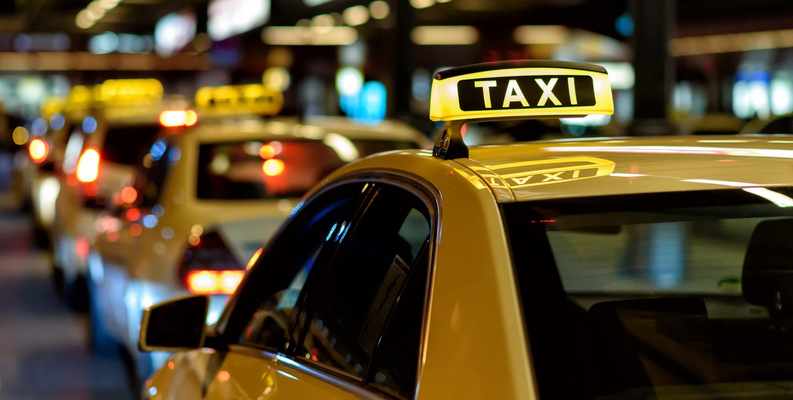

# Taxi Price Regression

Data source: https://www.kaggle.com/datasets/denkuznetz/taxi-price-prediction

## Overview

This dataset is designed to predict taxi trip fares based on various factors such as distance, time of day, traffic conditions, and more. It provides realistic synthetic data for regression tasks, offering a unique opportunity to explore pricing trends in the taxi industry.

## Dataset Highlights

* 1,000+ rows of data, ensuring a robust sample for model training.es.

* Includes missing values and outliers for realistic preprocessing challenges.

* Introduces correlations among some features to simulate real-world scenarios.

* Suitable for regression analysis and feature engineering exercises.

 -----------------------------------------------------------------------------

This notebook is developed by Machine Learning and Regression criterias including three main parts:

Data loading and data analysis, Data preprocessing, Modeling and evaluation

## Part 1: Data loading and data analysis

#### Main tools: Pandas, matplotlib and seaborn

In [534]:
# Import necessaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor , ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

scaler = StandardScaler() # Instancing from 'StandardScaler' object
imputer = SimpleImputer(strategy='most_frequent') # Instancing from 'SimpleImputer' object with 'most_frequent' strategy

In [535]:
# File loading
file = pd.read_csv('taxi_trip_pricing.csv')
df = file.copy()
df.sample(10)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
518,49.38,Morning,Weekday,1.0,Low,Clear,3.64,1.03,0.28,9.47,57.1530
813,NaN,Morning,Weekday,3.0,High,Snow,2.81,1.04,0.34,NaN,66.8568
674,21.11,Evening,Weekend,3.0,High,Clear,3.54,0.65,0.36,36.50,30.4015
550,26.49,Night,Weekday,1.0,High,Clear,3.54,1.82,0.15,99.20,66.6318
509,36.56,Evening,Weekend,3.0,Low,Clear,2.76,0.81,0.12,NaN,40.9716
545,18.55,Afternoon,Weekday,1.0,Medium,Clear,4.28,1.07,0.14,NaN,25.3115
549,38.84,Afternoon,Weekday,1.0,Low,Clear,4.81,1.23,NaN,64.42,62.8904
36,15.93,Afternoon,Weekday,2.0,Low,NaN,2.44,1.50,0.42,20.67,35.0164
568,45.30,Afternoon,Weekend,3.0,Medium,Rain,2.32,0.73,0.28,8.51,37.7718
384,37.02,Afternoon,Weekday,4.0,High,NaN,3.44,1.91,0.14,NaN,87.8962


In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [537]:
df.isnull().sum() # Find number of null values 

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [538]:
df.duplicated().sum() # Find number of duplicated values

0

In [539]:
# Filling some numeric columns with mean strategy
columns_for_mean = ['Trip_Distance_km',
                    'Base_Fare',
                    'Per_Km_Rate',
                    'Per_Minute_Rate',
                    'Trip_Duration_Minutes',
                    'Trip_Price']
for col in columns_for_mean:
    df.fillna({col:int(df[col].mean())},inplace=True)

In [540]:
df.fillna({'Passenger_Count':df.Passenger_Count.median()},inplace=True) # Filling 'Passenger_Count' column with median strategy

In [541]:
# Filling categorical columns with most frequent strategy
columns_for_mf = [df[col].to_numpy().reshape(-1,1) for col in ['Time_of_Day','Day_of_Week','Traffic_Conditions','Weather']] 
imputed_columns = [pd.DataFrame(imputer.fit_transform(col)) for col in columns_for_mf]
df = df.drop(['Time_of_Day','Day_of_Week','Traffic_Conditions','Weather'],axis=1)
idx = 0
for col in ['Time_of_Day','Day_of_Week','Traffic_Conditions','Weather']:
    df[col]=imputed_columns[idx]
    idx+=1

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Passenger_Count        1000 non-null   float64
 2   Base_Fare              1000 non-null   float64
 3   Per_Km_Rate            1000 non-null   float64
 4   Per_Minute_Rate        1000 non-null   float64
 5   Trip_Duration_Minutes  1000 non-null   float64
 6   Trip_Price             1000 non-null   float64
 7   Time_of_Day            1000 non-null   object 
 8   Day_of_Week            1000 non-null   object 
 9   Traffic_Conditions     1000 non-null   object 
 10  Weather                1000 non-null   object 
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [543]:
df.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather
0,19.35,3.0,3.56,0.80,0.32,53.82,36.2624,Morning,Weekday,Low,Clear
1,47.59,1.0,3.00,0.62,0.43,40.57,56.0000,Afternoon,Weekday,High,Clear
2,36.87,1.0,2.70,1.21,0.15,37.27,52.9032,Evening,Weekend,High,Clear
3,30.33,4.0,3.48,0.51,0.15,116.81,36.4698,Evening,Weekday,Low,Clear
4,27.00,3.0,2.93,0.63,0.32,22.64,15.6180,Evening,Weekday,High,Clear


In [544]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,27.067020,2.453000,3.477840,1.22165,0.278270,62.112210,56.831909
std,19.400781,1.079331,0.855169,0.42200,0.129508,31.339424,39.465262
min,1.230000,1.000000,2.010000,0.50000,0.000000,5.010000,6.126900
25%,13.107500,2.000000,2.770000,0.87000,0.180000,37.107500,34.578850
50%,26.975000,2.000000,3.460000,1.18000,0.280000,62.000000,52.617000
75%,37.782500,3.000000,4.202500,1.58000,0.382500,87.775000,67.476650
max,146.067047,4.000000,5.000000,2.00000,0.500000,119.840000,332.043689


In [545]:
# Finding average of numeric features on each value in 'Time_of_Day' column
result = list()
for i in df.Time_of_Day.unique():
    temp_df = df[df.Time_of_Day==i]
    result.append([i,
                   temp_df.Trip_Distance_km.mean(),
                   temp_df.Passenger_Count.mean(),
                   temp_df.Trip_Duration_Minutes.mean(),
                   temp_df.Trip_Price.mean()])

result = pd.DataFrame(result,columns=['Time_of_Day','Trip_Distance_km_mean','Passenger_Count_mean','Trip_Duration_Minutes_mean','Trip_Price_mean'])
result

,Time_of_Day,Trip_Distance_km_mean,Passenger_Count_mean,Trip_Duration_Minutes_mean,Trip_Price_mean
0,Morning,25.618087,2.487633,65.111307,55.952646
1,Afternoon,27.951903,2.403800,61.682518,57.754232
2,Evening,27.253312,2.467980,60.114483,56.392549
3,Night,27.063736,2.537634,59.291720,56.291309


In [546]:
# Finding average of numeric features on each value in 'Day_of_Week' column
result = list()
for i in df.Day_of_Week.unique():
    temp_df = df[df.Day_of_Week==i]
    result.append([i,
                   temp_df.Trip_Distance_km.mean(),
                   temp_df.Passenger_Count.mean(),
                   temp_df.Trip_Duration_Minutes.mean(),
                   temp_df.Trip_Price.mean()])

result = pd.DataFrame(result,columns=['Day_of_Week','Trip_Distance_km_mean','Passenger_Count_mean','Trip_Duration_Minutes_mean','Trip_Price_mean'])
result

,Day_of_Week,Trip_Distance_km_mean,Passenger_Count_mean,Trip_Duration_Minutes_mean,Trip_Price_mean
0,Weekday,27.351812,2.438298,62.081574,57.580645
1,Weekend,26.386415,2.488136,62.185424,55.042559


In [547]:
# Finding average of numeric features on each value in 'Traffic_Conditions' column
result = list()
for i in df.Traffic_Conditions.unique():
    temp_df = df[df.Traffic_Conditions==i]
    result.append([i,
                   temp_df.Trip_Distance_km.mean(),
                   temp_df.Passenger_Count.mean(),
                   temp_df.Trip_Duration_Minutes.mean(),
                   temp_df.Trip_Price.mean()])

result = pd.DataFrame(result,columns=['Traffic_Conditions','Trip_Distance_km_mean','Passenger_Count_mean','Trip_Duration_Minutes_mean','Trip_Price_mean'])
result

,Traffic_Conditions,Trip_Distance_km_mean,Passenger_Count_mean,Trip_Duration_Minutes_mean,Trip_Price_mean
0,Low,25.839482,2.454139,62.375078,55.528722
1,High,31.581603,2.439560,62.265934,64.561735
2,Medium,26.331319,2.458221,61.720081,54.610067


In [548]:
# Finding average of numeric features on each value in 'Weather' column
result = list()
for i in df.Weather.unique():
    temp_df = df[df.Weather==i]
    result.append([i,
                   temp_df.Trip_Distance_km.mean(),
                   temp_df.Passenger_Count.mean(),
                   temp_df.Trip_Duration_Minutes.mean(),
                   temp_df.Trip_Price.mean()])

result = pd.DataFrame(result,columns=['Weather','Trip_Distance_km_mean','Passenger_Count_mean','Trip_Duration_Minutes_mean','Trip_Price_mean'])
result

,Weather,Trip_Distance_km_mean,Passenger_Count_mean,Trip_Duration_Minutes_mean,Trip_Price_mean
0,Clear,26.600203,2.437936,61.924812,55.885464
1,Rain,29.184066,2.511013,61.929207,59.586609
2,Snow,24.462339,2.410714,65.253393,57.783416


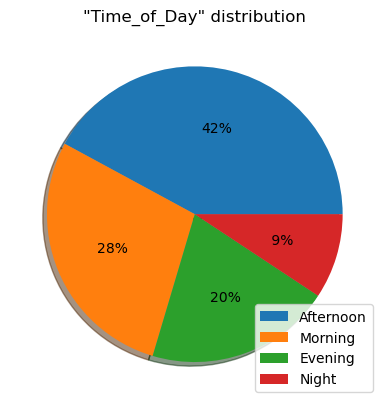

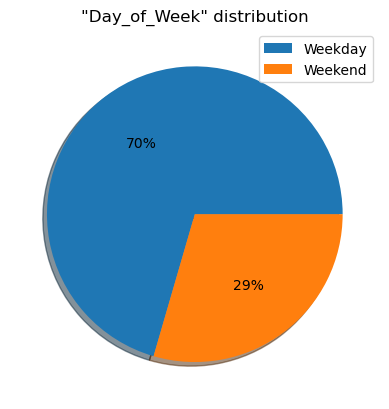

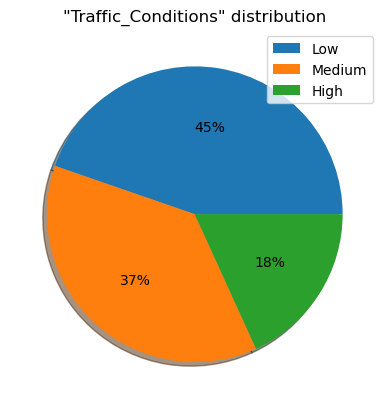

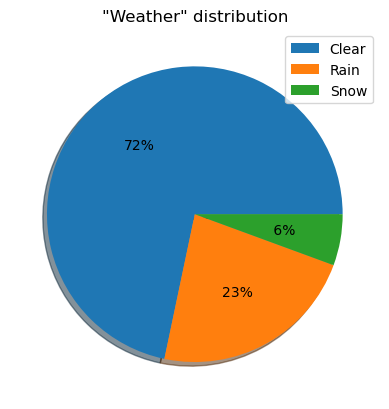

In [549]:
for col in ['Time_of_Day','Day_of_Week','Traffic_Conditions','Weather']:
    if col == 'Time_of_Day': Legend = ['Afternoon','Morning','Evening','Night']
    elif col == 'Traffic_Conditions': Legend = ['Low' , 'Medium','High']
    else : Legend = df[col].unique()
    plt.pie(df[col].value_counts().values,autopct='%2.f%%',shadow=True)
    plt.legend(Legend)
    plt.title(f'"{col}" distribution')
    plt.show()

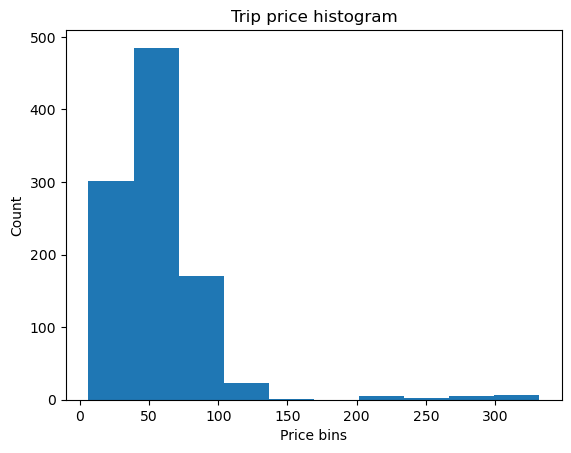

In [550]:
plt.hist(df.Trip_Price,bins=10,histtype='stepfilled')
plt.xlabel('Price bins')
plt.ylabel('Count')
plt.title('Trip price histogram')
plt.show()

In [551]:
# Find correlation coefficient in numeric features
temp_df = df[[col for col in df.columns if df[col].dtype!='O']]
Corr = temp_df.corr()
Corr['Trip_Price'].sort_values(ascending=False)

Trip_Price               1.000000
Trip_Distance_km         0.829828
Per_Km_Rate              0.253509
Trip_Duration_Minutes    0.215113
Per_Minute_Rate          0.098313
Base_Fare                0.033621
Passenger_Count         -0.012783
Name: Trip_Price, dtype: float64

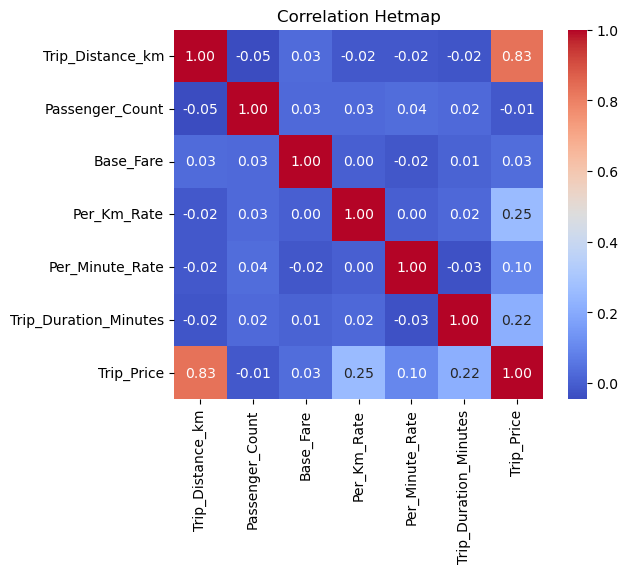

In [552]:
sn.heatmap(Corr,annot=True,fmt='.2f',cmap='coolwarm',square=True)
plt.title('Correlation Hetmap')
plt.show()

 -----------------------------------------------------------------------------

## Part 2: Data preprocessing

#### Main tools: Numpy, Scipy, Scikit-Learn and Pandas

In [553]:
# Calculate the Z-score for each value in the DataFrame
num_df = df[[col for col in df.columns if df[col].dtype!='O']]
z_scores = np.abs(stats.zscore(num_df))
# Identify columns where any Z-score is greater than 3
outliers = (z_scores > 3).any(axis=0)
# Print the columns with potential outliers
print(f"Columns with potential outliers: {num_df.columns[outliers]}")

Columns with potential outliers: Index(['Trip_Distance_km', 'Trip_Price'], dtype='object')


In [554]:
# Calculate Z-scores only for 'Trip_Distance_km' and 'Trip_Price' columns
z_scores = np.abs(stats.zscore(df[['Trip_Distance_km', 'Trip_Price']]))
# Create a boolean mask to filter out rows where Z-score > 3 in either column
Filter = (z_scores < 3).all(axis=1)
# Filter the DataFrame
df_cleaned = df[Filter]
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_cleaned.shape)

Shape before removing outliers: (1000, 11)
Shape after removing outliers: (980, 11)


In [555]:
df_cleaned.sample(10)

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather
989,41.14,3.0,4.14,1.71,0.17,46.78,82.4420,Evening,Weekend,Medium,Rain
431,38.31,1.0,2.99,0.64,0.41,31.15,40.2799,Afternoon,Weekend,Low,Clear
329,13.14,3.0,3.60,1.11,0.14,35.14,23.1050,Afternoon,Weekday,Low,Clear
165,41.93,4.0,4.34,1.64,0.21,69.27,87.6519,Evening,Weekend,Medium,Rain
157,38.32,1.0,4.58,0.98,0.37,28.41,52.6453,Evening,Weekday,Medium,Clear
296,38.73,2.0,2.41,1.94,0.47,20.75,87.2987,Morning,Weekday,Medium,Clear
767,43.96,2.0,2.29,1.08,0.25,37.22,59.0718,Afternoon,Weekday,Low,Clear
758,44.80,1.0,4.51,1.58,0.35,94.11,108.2325,Morning,Weekend,Low,Clear
172,26.09,4.0,3.92,0.87,0.45,62.23,54.6218,Afternoon,Weekday,Medium,Rain
227,20.26,3.0,2.29,0.63,0.27,29.70,23.0728,Morning,Weekday,Low,Rain


In [556]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       980 non-null    float64
 1   Passenger_Count        980 non-null    float64
 2   Base_Fare              980 non-null    float64
 3   Per_Km_Rate            980 non-null    float64
 4   Per_Minute_Rate        980 non-null    float64
 5   Trip_Duration_Minutes  980 non-null    float64
 6   Trip_Price             980 non-null    float64
 7   Time_of_Day            980 non-null    object 
 8   Day_of_Week            980 non-null    object 
 9   Traffic_Conditions     980 non-null    object 
 10  Weather                980 non-null    object 
dtypes: float64(7), object(4)
memory usage: 91.9+ KB


In [557]:
# Separate labels
label = df_cleaned.Trip_Price 
df_cleaned = df_cleaned.drop(['Trip_Price'],axis=1)

In [558]:
num_df = df_cleaned[[col for col in df_cleaned.columns if df_cleaned[col].dtype!='O']] # Separate numeric columns
nan_df  = df_cleaned[[col for col in df_cleaned.columns if df_cleaned[col].dtype=='O']] # Separate non-numeric columns

In [559]:
num_df.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,19.35,3.0,3.56,0.80,0.32,53.82
1,47.59,1.0,3.00,0.62,0.43,40.57
2,36.87,1.0,2.70,1.21,0.15,37.27
3,30.33,4.0,3.48,0.51,0.15,116.81
4,27.00,3.0,2.93,0.63,0.32,22.64


In [560]:
nan_df.head()

,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather
0,Morning,Weekday,Low,Clear
1,Afternoon,Weekday,High,Clear
2,Evening,Weekend,High,Clear
3,Evening,Weekday,Low,Clear
4,Evening,Weekday,High,Clear


In [561]:
scaled_df = pd.DataFrame(scaler.fit_transform(num_df),columns=num_df.columns) # Scale the numeric data
encoded_df = pd.get_dummies(nan_df) # Encode the non-numeric data
final_df = pd.concat([scaled_df.reset_index(drop=True),encoded_df.reset_index(drop=True)],axis=1) # Create an unique data frame

In [562]:
final_df.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,-0.414466,0.499642,0.096347,-0.997958,0.317137,-0.262412,False,False,True,False,True,False,False,True,False,True,False,False
1,1.601109,-1.355089,-0.559593,-1.425125,1.166937,-0.684068,True,False,False,False,True,False,True,False,False,True,False,False
2,0.835990,-1.355089,-0.910989,-0.024967,-0.996188,-0.789085,False,True,False,False,False,True,True,False,False,True,False,False
3,0.369210,1.427007,0.002641,-1.686171,-0.996188,1.742128,False,True,False,False,True,False,False,True,False,True,False,False
4,0.131538,0.499642,-0.641585,-1.401393,0.317137,-1.254657,False,True,False,False,True,False,True,False,False,True,False,False


In [563]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip_Distance_km           980 non-null    float64
 1   Passenger_Count            980 non-null    float64
 2   Base_Fare                  980 non-null    float64
 3   Per_Km_Rate                980 non-null    float64
 4   Per_Minute_Rate            980 non-null    float64
 5   Trip_Duration_Minutes      980 non-null    float64
 6   Time_of_Day_Afternoon      980 non-null    bool   
 7   Time_of_Day_Evening        980 non-null    bool   
 8   Time_of_Day_Morning        980 non-null    bool   
 9   Time_of_Day_Night          980 non-null    bool   
 10  Day_of_Week_Weekday        980 non-null    bool   
 11  Day_of_Week_Weekend        980 non-null    bool   
 12  Traffic_Conditions_High    980 non-null    bool   
 13  Traffic_Conditions_Low     980 non-null    bool   

In [564]:
final_df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
count,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02
mean,-9.425567e-17,-1.522592e-16,3.172066e-16,-3.634281e-16,2.356392e-17,2.138879e-16
std,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00
min,-1.707746e+00,-1.355089e+00,-1.719201e+00,-1.709903e+00,-2.155005e+00,-1.815699e+00
25%,-8.762500e-01,-4.277236e-01,-8.289969e-01,-8.140388e-01,-7.644250e-01,-8.035641e-01
50%,9.906290e-02,-4.277236e-01,-2.078498e-02,-9.616100e-02,8.119602e-03,-2.098379e-03
75%,8.479448e-01,4.996417e-01,8.459930e-01,8.353003e-01,8.579187e-01,8.171087e-01
max,1.772404e+00,1.427007e+00,1.783050e+00,1.849822e+00,1.707718e+00,1.838552e+00


 -----------------------------------------------------------------------------

## Part 3: Modeling and evaluation

#### Main tools: Scikit-Learn, Xgboot, Lightgbm and Matplotlib

Since in this project, I worked on a regression problem to predict trip price, among several machine learning models, the `GradientBoostingRegressor` emerged as the top performer. This section explores the reasons behind its superior performance, backed by metrics, visualizations, and theoretical insights.

* Iterative Learning Process: : Gradient Boosting builds an ensemble of weak learners (typically decision trees) in a stage-wise manner. Each subsequent tree corrects the errors of the previous one, leading to a highly accurate modeediction.


* Flexibility: Gradient Boosting is flexible and can handle different types of data distributions, making it well-suited for complex relationships in the dataset.

* Handling Non-Linear Relationships: The model effectively captures non-linear patterns in the data, which other models like Linear Regression cannot.

* Feature Importance: Gradient Boosting effectively identifies the most relevant features, helping to focus on the variables that contribute the most to the prediction.

In [565]:
# Splitting data to train and test sets.
# 80% of data is considered as train set
xtr , xts , ytr , yts =  train_test_split(final_df,label,test_size=0.2,random_state=0)
print(f'Train set size: {len(xtr)}\nTest set size: {len(xts)}')

Train set size: 784
Test set size: 196


In [566]:
# List of regression models to evaluate
models = [RandomForestRegressor, GradientBoostingRegressor, LinearRegression, ExtraTreesRegressor,
          KNeighborsRegressor, DecisionTreeRegressor, XGBRegressor, LGBMRegressor]
result = list()
# Loop through each model in the list
for model in models:
    carrier = []  # Temporary list to store the metrics for the current model
    alg = model()
    # Train the model on the training dataset
    alg.fit(xtr, ytr)
    # Predict on the training dataset
    pred = alg.predict(xtr)
    # Predict on the test dataset
    pred_ts = alg.predict(xts)
    # Collect metrics for training and testing sets
    carrier.extend([str(alg)[:-2],  # Extract the model name (removing extra characters)
                    mean_absolute_error(ytr, pred),  # MAE on training set
                    mean_absolute_percentage_error(ytr, pred) * 100,  # MAPE (%) on training set
                    mean_absolute_error(yts, pred_ts),  # MAE on test set
                    mean_absolute_percentage_error(yts, pred_ts) * 100])  # MAPE (%) on test set
    # Re-train the model on the full dataset (final_df and label)
    alg.fit(final_df, label)
    # Predict on the full dataset
    pred = alg.predict(final_df)
    # Collect metrics for the full dataset
    carrier.extend([mean_absolute_error(label, pred),  # MAE on full data
                    mean_absolute_percentage_error(label, pred) * 100])  # MAPE (%) on full data
    # Append the collected metrics for the current model to the results list
    result.append(carrier)
    
# Convert the results list into a DataFrame for easier interpretation and display
result = pd.DataFrame(result, columns=['Model',  
                                       'MAE on train set',  
                                       'MAPE on train set',  
                                       'MAE on test set',  
                                       'MAPE on test set',  
                                       'MAE on full data',  
                                       'MAPE on full data'])  

result

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 784, number of used features: 18
[LightGBM] [Info] Start training from score 52.428559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

,Model,MAE on train set,MAPE on train set,MAE on test set,MAPE on test set,MAE on full data,MAPE on full data
0,RandomForestRegressor,2.374804e+00,5.606458e+00,6.049511,13.925342,2.303743e+00,5.319686e+00
1,GradientBoostingRegressor,3.629770e+00,8.261592e+00,5.329563,12.215723,3.676771e+00,8.483708e+00
2,LinearRegression,7.639780e+00,1.818715e+01,7.680395,19.847194,7.620650e+00,1.854759e+01
3,ExtraTreesRegressor,5.784035e-14,1.110315e-13,6.148625,14.233065,5.740895e-14,1.108167e-13
4,KNeighborsRegressor,8.108929e+00,1.985895e+01,9.301664,22.607551,7.922199e+00,1.931571e+01
5,DecisionTreeRegressor,0.000000e+00,0.000000e+00,9.722242,21.153604,0.000000e+00,0.000000e+00
6,"XGBRegressor(base_score=None, booster=None, ca...",1.989961e-01,4.805779e-01,6.277919,15.025464,2.480454e-01,5.833949e-01
7,LGBMRegressor,1.935540e+00,4.444980e+00,5.865331,13.252734,1.998295e+00,4.539540e+00


In [567]:
# Define the model and hyperparameter grid
model = GradientBoostingRegressor()
params = {'n_estimators': [100, 200],
          'learning_rate': [0.01, 0.1],
          'max_depth': [3, 4],
          'loss':['squared_error','absolute_error']}
# Perform GridSearchCV
grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(xtr, ytr)
# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 3, 'n_estimators': 200}


In [568]:
# Create a model
model = GradientBoostingRegressor(learning_rate= 0.1, loss= 'absolute_error', max_depth= 3, n_estimators= 200)
# Use cross validation technique in order to have better insight.
scores = cross_val_score(model,final_df,label,cv=5,scoring='neg_mean_absolute_error')
print("Cross-Validation MAE scores:", -scores)
print("Mean MAE scores:", -scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation MAE scores: [5.34983038 5.03834666 4.9591046  5.21145352 4.45297425]
Mean MAE scores: 5.002341882877437
Standard Deviation: 0.3064136206276678


In [569]:
model.fit(xtr,ytr)

GradientBoostingRegressor(loss='absolute_error', n_estimators=200)

In [570]:
pred = model.predict(xtr)
print('MAE on train set: ',mean_absolute_error(ytr,pred))
print('MAPE on train set: ',mean_absolute_percentage_error(ytr,pred)*100)

MAE on train set:  3.359909737670464
MAPE on train set:  7.37055333664743


In [571]:
pred = model.predict(xts)
print('MAE on test set: ',mean_absolute_error(yts,pred))
print('MAPE on test set: ',mean_absolute_percentage_error(yts,pred)*100)

MAE on test set:  4.50968629230351
MAPE on test set:  10.306691649172297


In [572]:
model.fit(final_df,label)
pred = model.predict(final_df)
print('MAE on full data: ',mean_absolute_error(label,pred))
print('MAPE on full data: ',mean_absolute_percentage_error(label,pred)*100)

MAE on full data:  3.574168324373811
MAPE on full data:  7.597557362911628


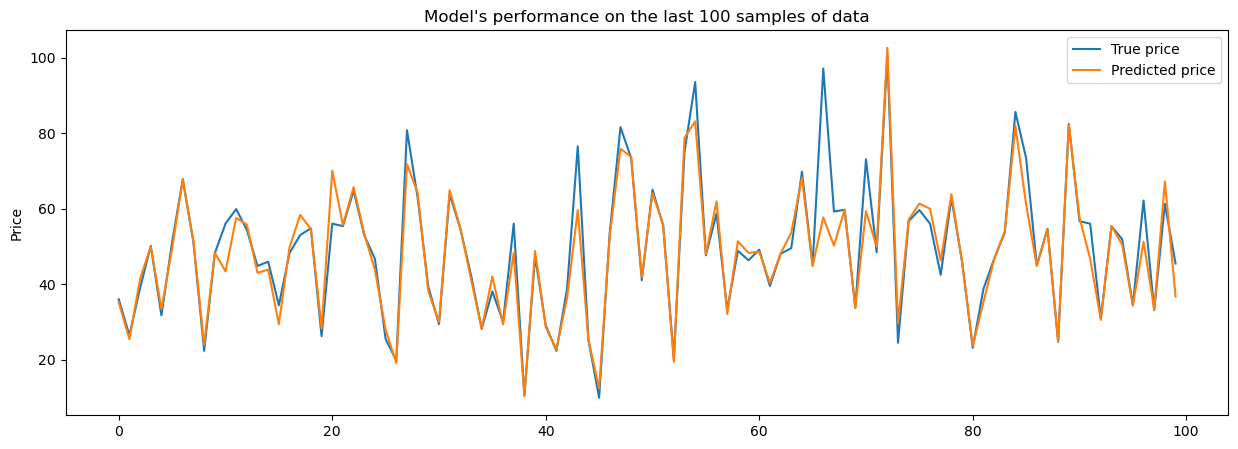

In [573]:
plt.figure(figsize=(15,5))
plt.plot(range(100),label[-100:])
plt.plot(range(100),pred[-100:])
plt.ylabel('Price')
plt.legend(['True price','Predicted price'])
plt.title("Model's performance on the last 100 samples of data" )
plt.show()

# End